# Estymatory największej wiarygodności

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [3]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= -1
sigma = 1

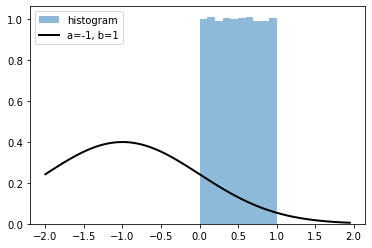

In [4]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [5]:
data2 = u.rvs(size=N)
mu= np.mean(data2)
sigma = np.sqrt(np.mean((data2-mu)**2))

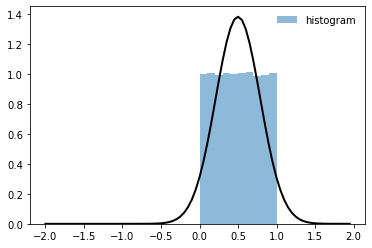

In [6]:
t = np.arange(-2, 2, 0.05)
fig2, ax2 = plt.subplots(1, 1)
ax2.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax2.legend(loc='best', frameon=False)
ax2.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2)
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

[1.75572976 1.76621628 2.10943644 1.99591766 2.48659875 1.80848595
 2.71610083 1.27282469 1.55217792 2.13958193 2.48317079 2.34101687
 1.90644461 1.67039806 1.1679177  1.92282225 2.72155177 1.48203525
 1.18890047 2.0116827  1.82364372 1.42058717 2.03158373 1.48741765
 2.38893963 2.84846308 2.18272574 2.20865435 1.29134391 1.12276471
 1.72108575 2.86765495 1.77057605 2.50785773 2.23662747 1.91052228
 1.00987245 1.55853366 2.48924669 2.30690873 2.50156784 1.17213294
 2.41837399 1.5291545  1.58564438 1.34463226 1.81068213 1.18622421
 2.28361251 2.60316373 1.53941582 1.75069215 1.5001181  1.14293031
 1.389034   2.78362029 2.59724329 2.44519717 2.06138824 1.59572373
 1.71972485 2.44098723 2.37216355 1.68561425 1.49901323 2.86679365
 2.06301244 1.86715929 1.18098899 1.43817584 1.56421198 1.00428126
 2.8203131  2.54811216 1.17532314 2.74556119 1.02776412 1.91707907
 1.44862191 2.00472646 1.45927688 1.24979378 2.69459695 2.98262503
 1.75831    1.8042234  1.7851268  1.7238981  2.65143369 1.1104

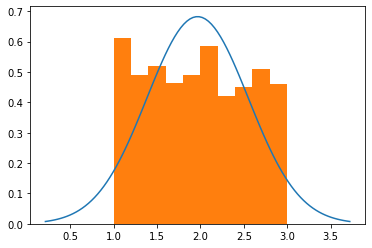

In [7]:
from scipy.stats import uniform, norm
a,b = 1,2
x = uniform.rvs(a,b,size=1000)
print(x)
loc1, scale1 = norm.fit(x)
print(loc1,scale1)
dom = np.linspace(loc1 - 3*scale1, loc1 + 3*scale1, 100)
plt.plot(dom,norm.pdf(dom,loc=loc1,scale=scale1))
plt.hist(x,density=True)
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [8]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [20]:
import scipy.stats as sts
# funkcja wiarygodnosci
def L(mu,sigma):
    X = sts.uniform.rvs(loc=mu,size=100,scale=sigma)
    return np.prod(Gpdf(X,mu,sigma))

print(L(1,1))

# logarytmiczna funkcja wiarygodnosci
def l(mu,sigma):
    return np.log(L(mu,sigma))


0.0


# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
g = Gpdf(x,0,1)

# np.prod(Gpdf(x,0,1))

# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [11]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [12]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

C:\Users\sch03\anaconda3\envs\podstawy_sztucznej_inteligencji\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc